In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["font.size"] = 12

## Numéro 1

The electronic density $n_e$ of a compound of $M$ elements is defined from its density $\rho$ and its composition of atoms of atomic numbers $N_i$ present with massic fractions of $f_i$ such that:
$$
    n_e = \rho\sum_{n=1}^MN_if_i
$$

In [10]:
def electronic_density(density, composition):
    """
    Calculate the electronic density of a compound.
    Params:
    density (float): The density of the compound in g/cm^3.
    composition (dict): A dictionary with the elements' atomic number as keys and the fraction (on 1) by weight of that element as values.
    Returns:
    float: The electronic density of the compound in g/cm^3.
    """
    electronic_density = 0
    for element in composition:
        electronic_density += element * composition[element]
    electronic_density *= density
    return electronic_density

In [11]:
# from NIST for liquid water (https://physics.nist.gov/cgi-bin/Star/compos.pl?refer=ap&matno=276)
liquid_water_density = 1
liquid_water_composition = {1: 0.111894, 8: 0.888106}
liquid_water_ne = electronic_density(liquid_water_density, liquid_water_composition)
print(f"The electronic density of liquid water is {liquid_water_ne:.2f} g/cm^3.")

# from NIST for compact bone (https://physics.nist.gov/cgi-bin/Star/compos.pl?refer=ap&matno=119)
compact_bone_density = 1.85
compact_bone_composition = {1: 0.063984, 6: 0.278000, 7: 0.027000, 8: 0.410016, 12: 0.002000, 15: 0.070000, 16: 0.002000, 20: 0.147000}
compact_bone_ne = electronic_density(compact_bone_density, compact_bone_composition)
print(f"The electronic density of compact bone is {compact_bone_ne:.2f} g/cm^3.")

The electronic density of liquid water is 7.22 g/cm^3.
The electronic density of compact bone is 17.11 g/cm^3.


## Numéro 2

The massic stopping power $S_{col, \rho}$ for a compound is defined like:
$$
\begin{aligned}
    S_{col, \rho} = \frac{S_{col}}{\rho} &= \frac{2\pi r_e^2m_ec^2n_e}{\rho\beta^2}\left[\ln\left(\frac{2m_ec^2(\gamma^2-1)T_e^{max}}{I^2}\right)-2\beta^2\right]\\
    &= \frac{2\pi r_e^2m_ec^2n_e}{\rho\beta^2}\left[\ln\left(\frac{2m_ec^2\beta^2\left(\frac{T}{m_pc^2}+1\right)^2T_e^{max}}{I^2}\right)-2\beta^2\right]\\
\text{where } T_e^{max} \text{ is defined and simplified as:}\\
    T_e^{max} &= \frac{2m_ec^2(\gamma^2-1)}{1+2\gamma\left(\frac{m_e}{m_p}\right)+\left(\frac{m_e}{m_p}\right)^2} = \frac{2m_ec^2\beta^2\left(\frac{T}{m_pc^2}+1\right)^2}{1+2\left(\frac{T}{m_pc^2}+1\right)\left(\frac{m_e}{m_p}\right)+\left(\frac{m_e}{m_p}\right)^2}\\
\text{and } \beta \text{ is found from the cinetic energy } T \text{ like:}\\
    \beta^2 &= \frac{2T}{m_p}
\end{aligned}
$$

In [31]:
def massic_stopping_power(n_e, rho, T, I):
    """
    Calculate the massic stopping power of a material.
    Params:
    n_e (float): The electronic density of the material in g/cm^3.
    Z (float): The atomic number of the material.
    beta (float): The velocity of the incident particle as a fraction of the speed of light.
    rho (float): The density of the material in g/cm^3.
    Returns:
    float: The massic stopping power of the material in MeV/g/cm^2.
    """
    c = 3e10 # speed of light in cm/s 
    r_e = 2.8179e-13 # radius of the electron in cm
    m_e = 0.511 # mass of the electron in MeV/c^2
    m_p = 938.272 # mass of the proton in MeV/c^2
    beta = 2*T / m_p # velocity of the incident particle as a fraction of the speed of light

    T_e_max = 2 * m_e * c**2 * beta**2*((T / (m_p * c**2)) + 1)**2 / (1 + 2 * (T / (m_p * c**2)) + 1 * (m_e / m_p) + (m_e / m_p)**2)
    prefactor = (2 * np.pi * r_e**2 * m_e * c**2 * n_e) / (rho * beta**2)
    log_argument = (2 * m_e * c**2 * beta**2 * ((T / (m_p * c**2)) + 1)**2 * T_e_max) / I**2
    logarithmic_term = np.log(log_argument) - 2 * beta**2
    return prefactor * logarithmic_term

In [36]:
T = np.linspace(3, 250, 1000) # array of kinetic energies of the incident particle in MeV

liquid_water_I = 75 # ionization energy of liquid water in eV

massic_stopping_power_water = massic_stopping_power(liquid_water_ne, liquid_water_density, T, liquid_water_I)

compact_bone_I = 91.9 # ionization energy of compact bone in eV

massic_stopping_power_bone = massic_stopping_power(compact_bone_ne, compact_bone_density, T, compact_bone_I)

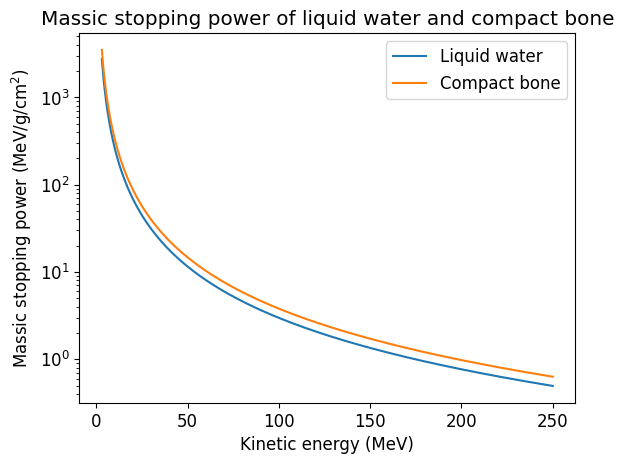

In [35]:
plt.plot(T, massic_stopping_power_water, label="Liquid water")  
plt.plot(T, massic_stopping_power_bone, label="Compact bone")
plt.yscale("log")
plt.xlabel("Kinetic energy (MeV)")
plt.ylabel(r"Massic stopping power (MeV/g/cm$^2$)")
plt.legend()
plt.title("Massic stopping power of liquid water and compact bone")
plt.show()

## Numéro 3

## Numéro 4

## Numéro 5

## Numéro 6

## Numéro 7

## Numéro 8

## Numéro 9

## Numéro 10

## Numéro 11

## Numéro 12

## Numéro 13

## Numéro 14

## Numéro 15

## Numéro 16

## Numéro 17